### ESMA 4016
### Clustering II.  Clustering Jerarquico Algomerativo
### Edgar Acuna 

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

###  I.  Clustering agglomerativo para  Diabetes

In [45]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


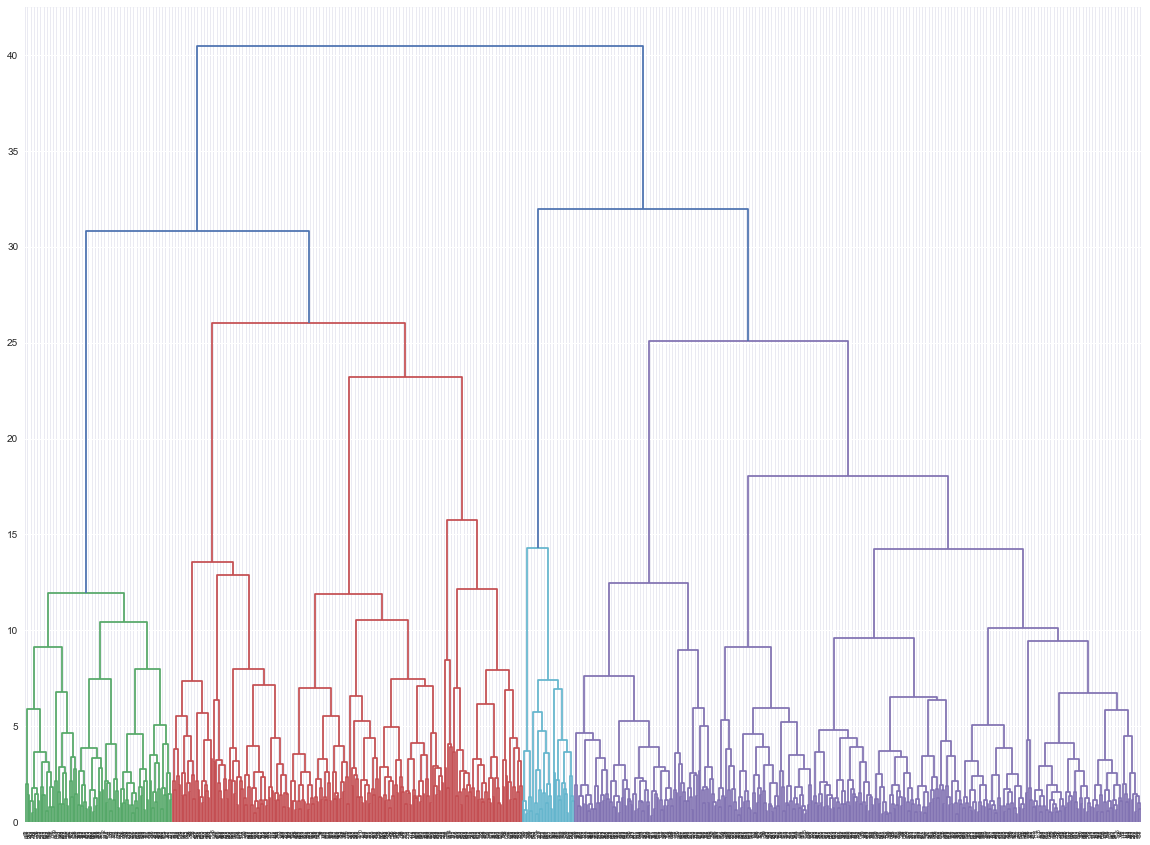

In [46]:
y=data['class']
X=data.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
dist2=pairwise_distances(X)
Z = linkage(X,'ward')
plt.figure(figsize=(20,15))
dn = hierarchy.dendrogram(Z)

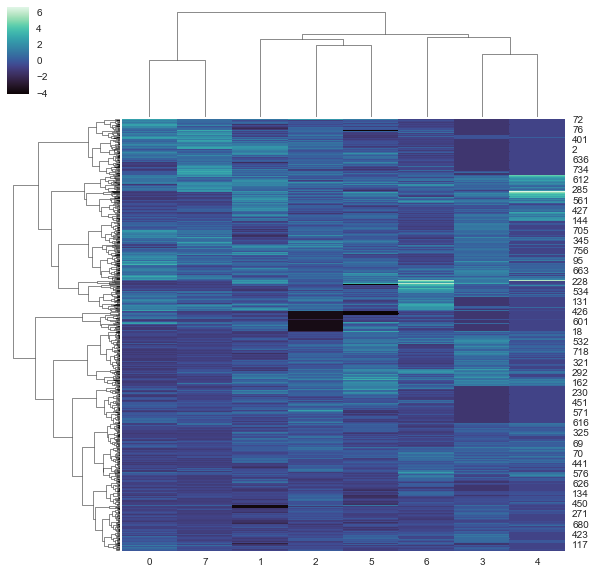

In [47]:
import seaborn as sns
sns.set(color_codes=True)
g = sns.clustermap(X, cmap="mako",method='ward')

In [52]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
n_clusters = 2
model = AgglomerativeClustering(n_clusters=n_clusters,linkage="average")
model.fit(X)
clustlabels=model.fit_predict(X)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los dos clusters formados")
print(np.asarray((unique_elements, counts_elements)))

Tamano de los dos clusters formados
[[  0   1]
 [761   7]]


Los outliers que tienen diabetes afectan tremendamente  al linkage average.
Vamos a cambiar al linkage Ward

In [53]:
model = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
model.fit(X)
clustlabels=model.fit_predict(X)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los dos clusters formados")
print(np.asarray((unique_elements, counts_elements)))

Tamano de los dos clusters formados
[[  0   1]
 [426 342]]


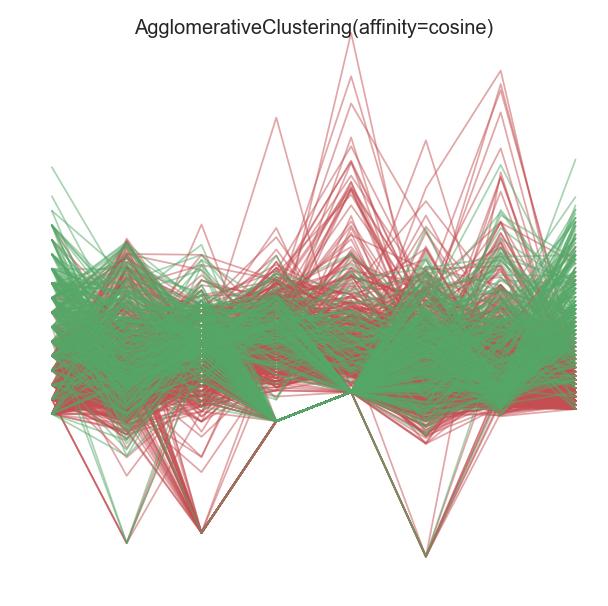

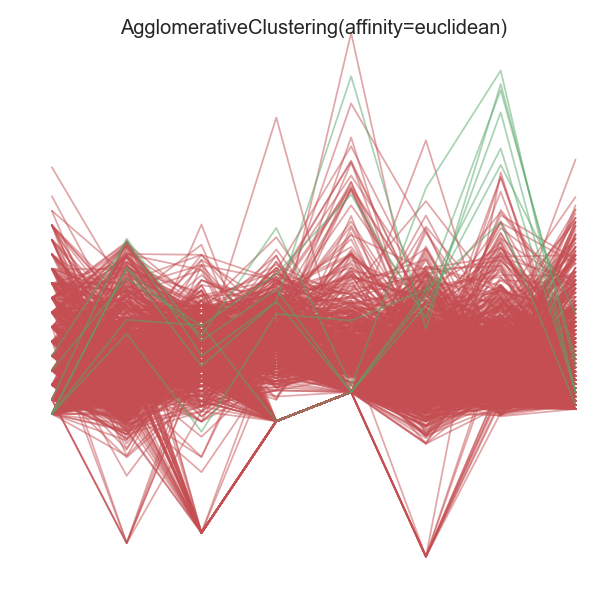

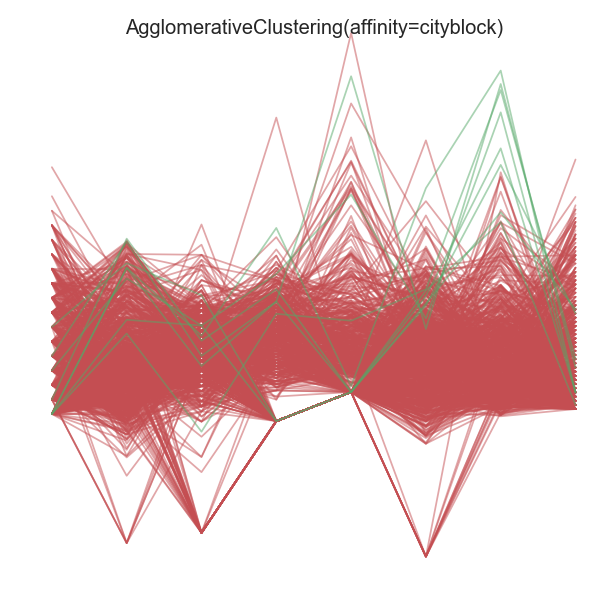

In [57]:
# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,linkage="average", affinity=metric)
    model.fit(X)
    plt.figure(figsize=(8,8))
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()

In [ ]:
#distancia Euclideana
dist2=pairwise_distances(X)
dist2

In [5]:
#Distancia Manhattan tambien llamada CityBlock
dist_manh=pairwise_distances(X,metric="cityblock")
dist_manh

array([[ 0.        ,  7.48176212,  7.27315027, ...,  6.66185328,
         6.52829826,  7.206271  ],
       [ 7.48176212,  0.        ,  8.54177411, ...,  4.42959032,
         5.22414488,  1.85434371],
       [ 7.27315027,  8.54177411,  0.        , ...,  7.48796614,
         7.18435902,  9.8953635 ],
       ..., 
       [ 6.66185328,  4.42959032,  7.48796614, ...,  0.        ,
         6.63552353,  4.98197366],
       [ 6.52829826,  5.22414488,  7.18435902, ...,  6.63552353,
         0.        ,  5.67721907],
       [ 7.206271  ,  1.85434371,  9.8953635 , ...,  4.98197366,
         5.67721907,  0.        ]])

Mientras mas oscura sea la celda menor es la distancia correlacion mientras mas clara mayor es la distancia correlacion cuyo valor a lo mas [uede alcanzar el valor de 2]

### 4. Aplicando Clustering Jerarquico Algomerativo a Landsat, k=6

In [59]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
n_clusters=6
model = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
model.fit(X)
clustlabels=model.fit_predict(X)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los seis clusters formados")
print(np.asarray((unique_elements, counts_elements)))

Tamano de los seis clusters formados
[[   0    1    2    3    4    5]
 [1053  763  726  998  462  433]]


In [15]:
pd.value_counts(y.values, sort=False)

4     415
1    1072
5     470
2     479
6    1038
3     961
dtype: int64

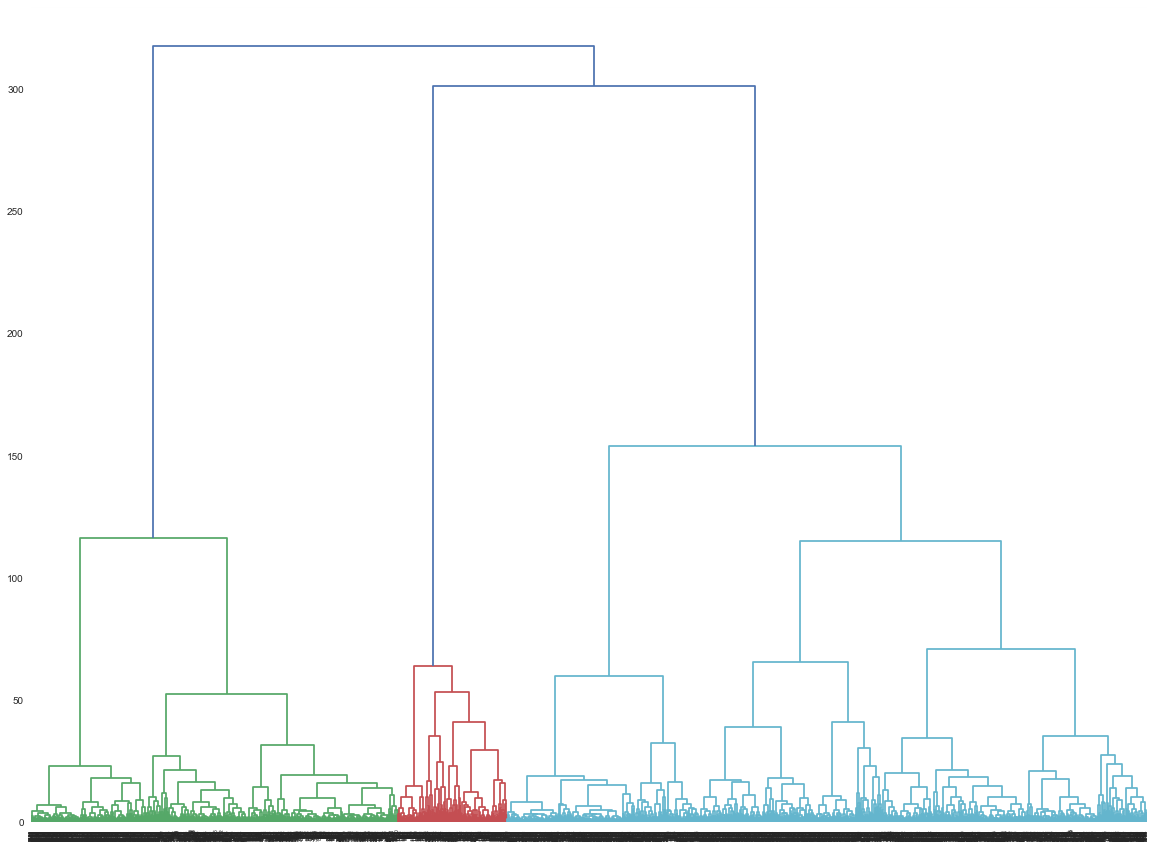

In [60]:
dist2=pairwise_distances(X)
Z = linkage(X,'ward')
plt.figure(figsize=(20,15))
dn = hierarchy.dendrogram(Z)

### 5.  Kmeans aplicado a Shuttle, k=7

### 6. Aplicando clustering con PAM para Diabetes, k=2